<a href="https://www.kaggle.com/code/arnabmukherjee853/cifer10-cnn?scriptVersionId=195338973" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import Input, Flatten, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout, Conv2D
from tensorflow.keras.models import Model

2024-09-04 18:43:11.122671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 18:43:11.122758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 18:43:11.248582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
cifar10 = tf.keras.datasets.cifar10
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()
Xtrain, Xtest = Xtrain/255.0, Xtest/255
Ytrain, Ytest = Ytrain.flatten(), Ytest.flatten()
print("Xtrain shape: ", Xtrain.shape)
print("Xtest shape: ", Xtest.shape)
print("Ytrain shape: ", Ytrain.shape)
print("Ytest shape: ", Ytest.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Xtrain shape:  (50000, 32, 32, 3)
Xtest shape:  (10000, 32, 32, 3)
Ytrain shape:  (50000,)
Ytest shape:  (10000,)


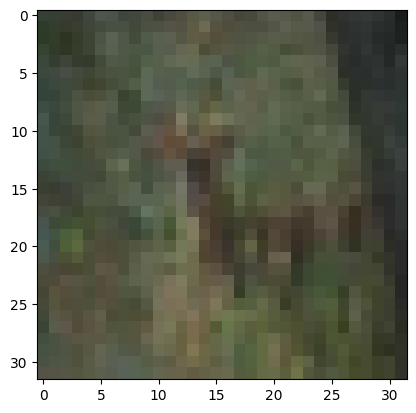

In [4]:
plt.imshow(Xtrain[10])
plt.show()

In [5]:
L = len(set(Ytrain))
print("No of Predictive classes: ", L)

No of Predictive classes:  10


In [17]:
i = Input(shape=Xtrain[0].shape)
x = Conv2D(32,(3,3),strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),strides=(2,2),  padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(L, activation='softmax')(x)

model = Model(i,x)

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
R = model.fit(Xtrain, Ytrain, validation_data = (Xtest, Ytest), epochs=35)

Epoch 1/35
  36/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1934 - loss: 4.2653

W0000 00:00:1725476022.751997     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4163 - loss: 1.8263

W0000 00:00:1725476031.315024     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1725476032.403887     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.4164 - loss: 1.8261 - val_accuracy: 0.4637 - val_loss: 1.7523
Epoch 2/35
  37/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5876 - loss: 1.1979

W0000 00:00:1725476033.420095     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5825 - loss: 1.1759 - val_accuracy: 0.5752 - val_loss: 1.1774
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6513 - loss: 0.9879 - val_accuracy: 0.6458 - val_loss: 1.0137
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6978 - loss: 0.8649 - val_accuracy: 0.6445 - val_loss: 1.0204
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7301 - loss: 0.7715 - val_accuracy: 0.6481 - val_loss: 1.0034
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7703 - loss: 0.6540 - val_accuracy: 0.6525 - val_loss: 1.0103
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8000 - loss: 0.5705 - val_accuracy: 0.6932 - val_loss: 0.9200
Epoch 8/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8283 - loss: 0.4910 - val_accuracy: 0.6893 - val_loss: 0.9365
Epoch 9/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8484 - loss: 0.4316 - val_accura

In [8]:
# batch_size = 32
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,
#                                                                 height_shift_range = 0.1,
#                                                                 horizontal_flip = True,
#                                                                 vertical_flip = True)
# train_generator = data_generator.flow(Xtrain, Ytrain, batch_size)
# steops_per_epoch = Xtrain.shape[0]//batch_size
# R = model.fit_generator(train_generator, validation_data = (Xtest, Ytest), steps_per_epoch = steps_per_epoch, epochs= 15)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
P_test = model.predict(Xtest).argmax(axis = 1)
print(confusion_matrix(Ytest, P_test))
print(classification_report(Ytest, P_test))

106/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1725476346.025263     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[764  11  40  36  13  13   8  10  58  47]
 [ 15 801   4  17   5   5   7   3  30 113]
 [ 73   7 540  87  87  75  71  40  12   8]
 [ 13  10  53 558  53 209  51  28   9  16]
 [ 28   2  41 109 622  60  54  65  14   5]
 [ 13   4  34 180  51 624  36  40   7  11]
 [  8   3  30  66  37  35 805   6   4   6]
 [  9   5  27  37  62  72  10 761   4  13]
 [ 68  36   7  23   3  12   9   6 804  32]
 [ 25  72  11  15   8  13   4  10  30 812]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.84      0.80      0.82      1000
           2       0.69      0.54      0.60      1000
           3       0.49      0.56      0.52      1000
           4       0.66      0.62      0.64      1000
           5       0.56      0.62      0.59      1000
           6       0.76      0.81      0.78      1000
           7       0.79      0.76      0.77      1000
           8       0.83      0.80      0.

W0000 00:00:1725476346.841382     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


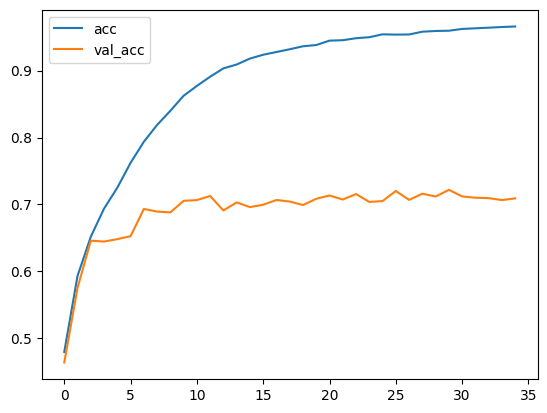

In [20]:
plt.plot(R.history['accuracy'], label='acc')
plt.plot(R.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

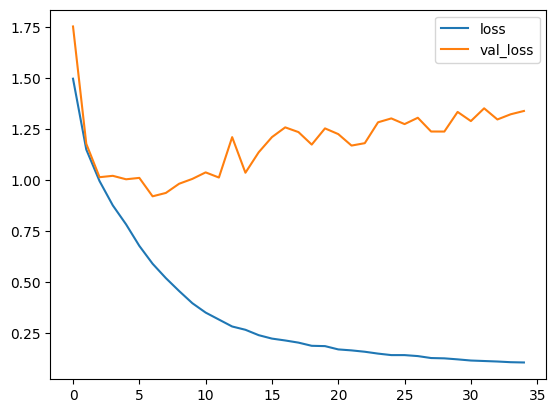

In [21]:
plt.plot(R.history['loss'], label='loss')
plt.plot(R.history['val_loss'], label='val_loss')
plt.legend()
plt.show()